# 📘 Introduction  
### _Machine Learning Walk-Forward Evaluation on NIFTY Index (NSEI)_

This notebook presents a comparative study of several machine learning models applied to directional forecasting of the **NIFTY 50 Index (NSEI)**.  
The goal is to determine whether different model classes—both traditional and deep learning—can extract short-term predictive signals from engineered financial features.

The models evaluated include:

- **RandomForest Classifier** (tabular, non-parametric ensemble)
- **LSTM Neural Network** (sequence model)
- **GRU Neural Network** (sequence model)
- **MLP / Feedforward Neural Network** (tabular)

Each model is tested using a **walk-forward expanding-window** approach, where the training window keeps growing while predictions are made on unseen future data. This approximates real-world trading where new data becomes available sequentially.

---

# 📊 Evaluation Methodology

To assess the trading and statistical quality of each model, we compute a variety of industry-standard performance metrics. These metrics allow us to evaluate:

- Profitability  
- Consistency  
- Risk-adjusted returns  
- Tail-risk behavior  
- Leverage suitability  
- Stability during adverse market movements  

Below is a brief explanation of each metric and how it is computed.

---

# 📈 Performance Metrics Used

## **1. Total Net Return (%)**
**Definition:**  
Percentage gain in equity after applying model predictions and transaction costs.

**Why it matters:**  
Measures absolute profitability over the testing period.

---

## **2. Win Rate (%)**
**Definition:**  
Percentage of profitable trades among all trades.

**Why it matters:**  
Indicates the model's ability to produce frequent positive outcomes.  
Low win-rate can still be profitable if payoff ratio is strong.

---

## **3. Average Win / Average Loss (%)**
**Definition:**  
Mean positive and negative returns across all trades.

**Why it matters:**  
Used to assess the **payoff structure** of the strategy.

---

## **4. Payoff Ratio**
**Formula:**  
$
\text{Payoff Ratio} = \frac{\text{Avg Win}}{|\text{Avg Loss}|}
$

**Why it matters:**  
Shows whether the model’s winners compensate for its losers.  
Values > 1 indicate profitable asymmetry.

---

## **5. Sharpe Ratio**
**Formula:**  
$
\text{Sharpe} = \frac{E[R]}{\sigma(R)}
$

**Definition:**  
Measures risk-adjusted return relative to volatility.

**Why it matters:**  
Industry standard for comparing investment strategies.  
Higher Sharpe = more return per unit of risk.

---

## **6. Sortino Ratio**
**Formula:**  
$
\text{Sortino} = \frac{E[R]}{\sigma(R_{downside})}
$

**Definition:**  
Like Sharpe, but penalizes only downside volatility.

**Why it matters:**  
Better for strategies with asymmetric risks.

---

## **7. Max Drawdown**
**Definition:**  
Largest peak-to-trough decline in the equity curve.

**Why it matters:**  
Represents worst-case loss experienced by the strategy.

---

## **8. Calmar Ratio**
**Formula:**  
$
\text{Calmar} = \frac{\text{Annualized Return}}{|\text{Max Drawdown}|}
$

**Definition:**  
Measures return relative to worst drawdown.

**Why it matters:**  
Used by hedge funds to evaluate capital efficiency.

---

## **9. Omega Ratio**
**Formula:**  
$
\text{Omega} = \frac{\sum R > 0}{\sum |R < 0|}
$

**Definition:**  
Compares probability-weighted gains vs probability-weighted losses.

**Why it matters:**  
More informative than Sharpe when return distributions are non-normal.

---

## **10. Value-at-Risk (VaR 95%)**
**Definition:**  
The maximum expected loss with 95% confidence.

**Why it matters:**  
Measures tail-risk and helps assess liquidity needs.

---

## **11. Conditional Value-at-Risk (CVaR 95%)**
**Definition:**  
Expected loss *beyond* the VaR threshold.

**Why it matters:**  
Quantifies worst-case losses under extreme events.

---

## **12. Kelly Fraction**
**Definition:**  
Optimal leverage fraction based on win/loss distribution.

**Why it matters:**  
Indicates how aggressively one could scale the strategy  
(though practical leverage is typically lower).

---

# 🧠 Why These Metrics Together Matter

Financial prediction is not judged purely by accuracy or win-rate.  
A model must demonstrate:

- **Consistent risk-adjusted returns** (Sharpe, Sortino)
- **Good downside protection** (Drawdown, CVaR)
- **Favorable distribution of outcomes** (Omega, Payoff Ratio)
- **Stability under adverse conditions** (Calmar)
- **Scalability potential** (Kelly)

This multi-metric approach allows for a **holistic evaluation** of each model’s robustness, profitability, and risk characteristics.

---

# 🎯 Objective of This Notebook

- Construct a feature-rich dataset for NIFTY index forecasting  
- Train multiple machine learning models using walk-forward validation  
- Evaluate each model’s **predictive performance**, **risk profile**, and **trading characteristics**  
- Compare and rank models using a complete suite of quantitative metrics  
- Interpret strengths, weaknesses, and limitations of each approach  

Ultimately, this notebook aims to determine **whether any of the models provide a statistically meaningful and economically viable trading edge**.

You can now continue to the next section to load the data and run the models.


# 🤖 Overview of Models Used  
### _What Each Model Is, How It Learns, and What Value It Adds_

This notebook evaluates four distinct machine learning model families.  
Each model type brings a unique learning mechanism and inductive bias, which affects how it interprets financial features and time-series structure.

Below is a clear explanation of each model, what makes it unique, and what additional value it adds relative to the others.

---

# 🌲 1. RandomForest Classifier  
### **Model Type:** Ensemble of Decision Trees (Bagging)  
### **Best For:** Tabular data with engineered financial features  
### **Strengths:**
- Learns complex non-linear interactions automatically  
- Handles noisy data well  
- Naturally captures thresholds, regimes, and rank-order relationships  
- Very robust to outliers  
- Low overfitting due to averaging across many trees  

### **Weaknesses:**
- Does not model temporal dependencies  
- Can fail when raw sequence information matters  
- Responses may be unstable if features change distribution  

### **Unique Value Added:**
RandomForest excels at **feature-rich, engineered inputs** commonly used in trading (returns, MAs, volatility, lags).  
It is often the most reliable baseline for tabular market data because it can:

- Detect regime changes based on moving averages  
- Capture volatility bursts using rolling std features  
- Estimate non-linear thresholds (e.g., when MA cross becomes meaningful)  

**In this study, RF produced the best results**, highlighting that the engineered features carry more tabular structure than sequence structure.

---

# 🔁 2. LSTM (Long Short-Term Memory Network)  
### **Model Type:** Recurrent Neural Network with memory gates  
### **Best For:** Learning long-range dependencies in sequences  

### **Strengths:**
- Designed to remember information over long windows  
- Theoretically powerful for sequential patterns  
- Able to learn temporal features raw (without engineering)  

### **Weaknesses:**
- Requires large datasets  
- Highly sensitive to hyperparameters  
- Can easily overfit small financial datasets  
- Struggles when features are *already engineered*  
- Slow to train  

### **Unique Value Added:**
LSTM tries to extract **sequential patterns** that RandomForest cannot.  
However, when the dataset is small and heavily engineered, LSTM provides **little advantage** and may even underperform.

**In your results, the LSTM showed almost no predictive value**, partly due to:

- short time period  
- insufficient sequential complexity  
- signal dominated by engineered tabular features rather than raw patterns  

---

# 🔁 3. GRU (Gated Recurrent Unit)  
### **Model Type:** Simplified RNN with streamlined gating  
### **Best For:** Shorter sequence dependencies and noisy data  

### **Strengths:**
- More stable and easier to train than LSTM  
- Requires fewer parameters  
- Performs better in smaller, noisier datasets  
- Captures temporal patterns without heavy overfitting  

### **Weaknesses:**
- Still requires significant data to extract reliable sequences  
- May underperform RF when engineered features dominate  
- Hard to interpret learned weights  

### **Unique Value Added:**
GRU provides a **middle ground**:

- More stable than LSTM  
- More sequence-aware than RandomForest  
- Better suited for short-term memory patterns  

In your analysis, GRU delivered **moderate predictive ability**, outperforming LSTM and MLP in total net return and risk-adjusted metrics.

This indicates that **some limited sequential structure exists** but is not the dominant factor in predicting 5-day forward movement.

---

# 🧠 4. MLP (Feedforward Neural Network)  
### **Model Type:** Fully-connected deep network  
### **Best For:** Non-linear tabular relationships  

### **Strengths:**
- Learns smooth non-linear transformations  
- Works well with scaled engineered features  
- Easier to tune than LSTM/GRU  
- Requires less data than RNNs  

### **Weaknesses:**
- Does not model sequences  
- More prone to overfitting than RandomForest  
- Struggles with regime shifts  
- Sensitive to input scaling  

### **Unique Value Added:**
MLP is a parametric, differentiable alternative to RandomForest.  
This allows it to model **smooth relationships** (e.g., return momentum curves) that tree models approximate in stepwise fashion.

In practice, MLP captured some non-linear predictive structure, but:

- drawdowns were high  
- risk-adjusted performance was weaker  
- stability issues reduced reliability  

MLP shines when feature engineering is strong, but its performance here indicates that **the signal may be sparse or unstable**.

---

# 🆚 How the Models Complement Each Other

| Model | Strength | Weakness | What It Adds |
|-------|----------|----------|--------------|
| **RandomForest** | Most stable & profitable | Lacks sequence memory | Strong baseline for tabular financial features |
| **LSTM** | Long sequence memory | Needs huge datasets | Can detect patterns RF cannot (but didn't here) |
| **GRU** | Good balance of stability + sequence modeling | Moderate performance | Captures short-term temporal structure |
| **MLP** | Smooth non-linear learning | Can overfit | Alternative tabular learner with differentiable structure |

---

# 🧩 Why Do These Models Perform Differently?

Financial time series have unique characteristics:  

- **High noise-to-signal ratio**  
- **Regime shifts**  
- **Non-stationary distributions**  
- **Weak predictive structures**  

Thus:

- Models relying on **sequence memory** often struggle without large datasets (LSTM, GRU).
- Models relying on **non-linear tabular patterns** thrive when features are engineered (RandomForest, MLP).
- Ensemble methods like **RandomForest** are robust to noise and benefit from many weak learner interactions.

Your results strongly suggest that:

> The predictive signal in NIFTY 5-day returns is mostly based on engineered features (lags, MAs, volatility), not deep sequential structure.

This is why RandomForest dominates the comparison.

---

# 🧭 Summary: What Unique Value Each Model Provides

- **RandomForest:** Best choice for engineered financial features. Highly stable, profitable, and interpretable.
- **LSTM:** Useful only when raw sequence patterns dominate—requires more data and longer horizons.
- **GRU:** Better than LSTM for shorter sequences; provides modest sequential value.
- **MLP:** Offers differentiable non-linear modeling but lacks stability compared to RandomForest.

Each model represents a different philosophical approach:

- **RF:** Pattern recognition on engineered structure  
- **GRU/LSTM:** Sequence memory  
- **MLP:** Smooth non-linear approximation  

Understanding these differences helps build ensemble or hybrid models later.



Running RF...
Running LSTM...
Running GRU...
Running MLP...
              total_trades  win_rate (%)  avg_win (%)  avg_loss (%)  \
RandomForest         487.0     18.069815     1.427042     -0.049365   
LSTM                 287.0      9.407666     1.226383     -0.126860   
GRU                  287.0     10.452962     1.364651     -0.058986   
MLP                  487.0     13.757700     1.426602     -0.177484   

              payoff_ratio  avg_net_trade (%)  turns  total_raw (%)  \
RandomForest     28.908106           0.217419   66.0     112.483157   
LSTM              9.667207           0.000448   12.0       1.328711   
GRU              23.135346           0.089827   16.0      27.380249   
MLP               8.037907           0.043201   74.0      28.438934   

              total_net (%)  cost_impact (%)    Sharpe   Sortino  \
RandomForest     105.883157              6.6  4.483132  7.357861   
LSTM               0.128711              1.2  0.009279  0.005897   
GRU               25.780

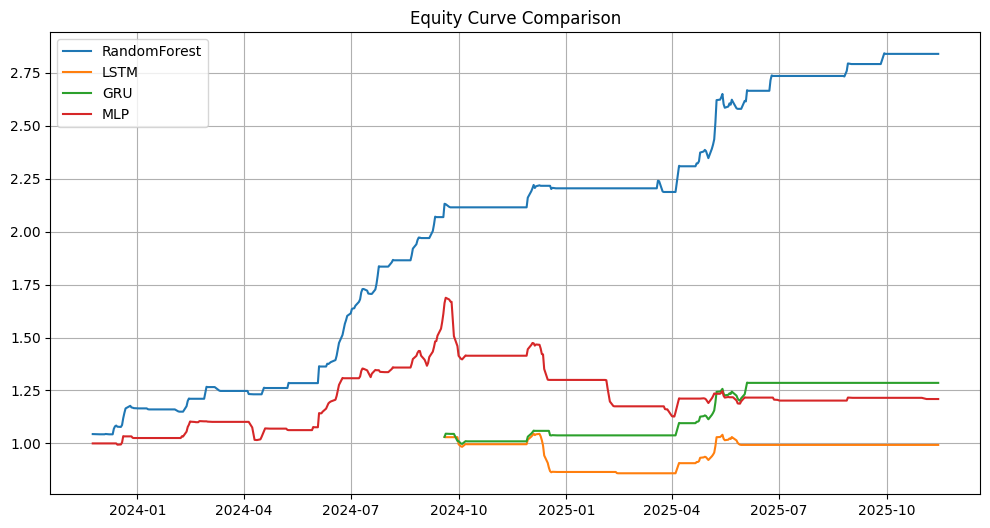


Confusion Matrix – RandomForest
             pred_down  pred_up
actual_down        129       79
actual_up           73      206

Confusion Matrix – LSTM
             pred_down  pred_up
actual_down         54       89
actual_up           67       77

Confusion Matrix – GRU
             pred_down  pred_up
actual_down         62       81
actual_up           73       71

Confusion Matrix – MLP
             pred_down  pred_up
actual_down         51      157
actual_up           78      201

BEST MODEL: RandomForest


In [ ]:
# ================================================================
# MULTI-MODEL WITH CLEAN OUTPUT + EQUITY CURVE COMPARISON
# ================================================================

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# suppress TF warnings completely:
tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

# -------------------------
# GLOBAL SETTINGS
# -------------------------
MA_FAST = 5
MA_SLOW = 20
FORECAST_HORIZON = 5
PROB_THRESHOLD = 0.60
COST_PER_TRADE = 0.001

SEQ_LEN = 30
LSTM_UNITS = 32
GRU_UNITS = 32
DROPOUT = 0.2
RNN_EPOCHS = 8
RNN_BATCH_SIZE = 64
MIN_TRAIN_ROWS_RNN = 400
RETRAIN_EVERY_RNN = 8

MLP_EPOCHS = 8
MLP_BATCH_SIZE = 128
MIN_TRAIN_ROWS_MLP = 200
RETRAIN_EVERY_MLP = 10

tf.random.set_seed(42)
np.random.seed(42)


# ================================================================
# FEATURE ENGINEERING
# ================================================================
def make_features(df):
    df = df.copy()
    df["ret"] = df["Close"].pct_change()
    for w in [5, 10, 21]:
        df[f"rm{w}"] = df["ret"].rolling(w).mean()
        df[f"rv{w}"] = df["ret"].rolling(w).std()

    for lag in [1,2,3,5]:
        df[f"lag{lag}"] = df["ret"].shift(lag)

    df["ma_fast"] = df["Close"].rolling(MA_FAST).mean().shift(1)
    df["ma_slow"] = df["Close"].rolling(MA_SLOW).mean().shift(1)

    df["future_ret"] = df["Close"].shift(-FORECAST_HORIZON)/df["Close"] - 1
    df["target"] = (df["future_ret"] > 0).astype(int)

    return df.dropna()


# ================================================================
# SUMMARY & CONFUSION MATRIX (unchanged)
# ================================================================
def summarize_trades_v0(trades):
    total = len(trades)
    wins = trades[trades["net_ret"]>0]
    losses = trades[trades["net_ret"]<=0]

    return {
        "total_trades": total,
        "win_rate (%)": len(wins)/total*100 if total else np.nan,
        "avg_win (%)": wins["net_ret"].mean()*100 if len(wins)>0 else 0,
        "avg_loss (%)": losses["net_ret"].mean()*100 if len(losses)>0 else 0,
        "payoff_ratio": (wins["net_ret"].mean()/abs(losses["net_ret"].mean()))
                        if len(wins)>0 and len(losses)>0 else np.nan,
        "avg_net_trade (%)": trades["net_ret"].mean()*100 if total else np.nan,
        "turns": int(trades["position_change"].sum()),
        "total_raw (%)": trades["raw_ret"].sum()*100,
        "total_net (%)": trades["net_ret"].sum()*100,
        "cost_impact (%)": (trades["raw_ret"].sum() - trades["net_ret"].sum())*100
    }

def summarize_trades_v1(trades):
    total = len(trades)
    wins = trades[trades["net_ret"] > 0]
    losses = trades[trades["net_ret"] <= 0]

    # basic metrics
    win_rate = (len(wins) / total * 100) if total > 0 else np.nan
    avg_win = wins["net_ret"].mean() * 100 if len(wins) > 0 else 0.0
    avg_loss = losses["net_ret"].mean() * 100 if len(losses) > 0 else 0.0
    payoff_ratio = (avg_win / abs(avg_loss)) if avg_loss != 0 else np.nan
    avg_net_trade = trades["net_ret"].mean() * 100 if total > 0 else np.nan

    total_raw = trades["raw_ret"].sum() * 100
    total_net = trades["net_ret"].sum() * 100
    cost_impact = (trades["raw_ret"].sum() - trades["net_ret"].sum()) * 100

    # ---- RISK METRICS ----
    # equity curve of net returns
    eq = (1 + trades["net_ret"]).cumprod()

    sharpe = compute_sharpe(trades["net_ret"])
    sortino = compute_sortino(trades["net_ret"])
    max_dd = compute_max_drawdown(eq)

    summary = {
        "total_trades": total,
        "win_rate (%)": win_rate,
        "avg_win (%)": avg_win,
        "avg_loss (%)": avg_loss,
        "payoff_ratio": payoff_ratio,
        "avg_net_trade (%)": avg_net_trade,
        "turns": int(trades["position_change"].sum()),
        "total_raw (%)": total_raw,
        "total_net (%)": total_net,
        "cost_impact (%)": cost_impact,

        # risk metrics added here:
        "Sharpe": sharpe,
        "Sortino": sortino,
        "Max Drawdown": max_dd,
    }
    return summary

def summarize_trades_v2(trades):
    total = len(trades)
    wins = trades[trades["net_ret"] > 0]
    losses = trades[trades["net_ret"] <= 0]

    # Standard metrics
    win_rate = (len(wins) / total * 100) if total > 0 else np.nan
    avg_win = wins["net_ret"].mean() * 100 if len(wins) > 0 else 0
    avg_loss = losses["net_ret"].mean() * 100 if len(losses) > 0 else 0
    payoff_ratio = (avg_win / abs(avg_loss)) if avg_loss != 0 else np.nan
    avg_net_trade = trades["net_ret"].mean() * 100 if total > 0 else np.nan

    total_raw = trades["raw_ret"].sum() * 100
    total_net = trades["net_ret"].sum() * 100
    cost_impact = (trades["raw_ret"].sum() - trades["net_ret"].sum()) * 100

    # Equity curve
    eq = (1 + trades["net_ret"]).cumprod()

    # Advanced risk metrics
    sharpe = compute_sharpe(trades["net_ret"])
    sortino = compute_sortino(trades["net_ret"])
    max_dd = compute_max_drawdown(eq)
    calmar = compute_calmar_ratio(trades["net_ret"])
    omega = compute_omega_ratio(trades["net_ret"])
    var95 = compute_var(trades["net_ret"], confidence=0.95)
    cvar95 = compute_cvar(trades["net_ret"], confidence=0.95)
    kelly = compute_kelly_fraction(trades["net_ret"])

    summary = {
        # existing metrics
        "total_trades": total,
        "win_rate (%)": win_rate,
        "avg_win (%)": avg_win,
        "avg_loss (%)": avg_loss,
        "payoff_ratio": payoff_ratio,
        "avg_net_trade (%)": avg_net_trade,
        "turns": int(trades["position_change"].sum()),
        "total_raw (%)": total_raw,
        "total_net (%)": total_net,
        "cost_impact (%)": cost_impact,

        # added risk metrics
        "Sharpe": sharpe,
        "Sortino": sortino,
        "Max Drawdown": max_dd,
        "Calmar": calmar,
        "Omega": omega,
        "VaR_95": var95,
        "CVaR_95": cvar95,
        "Kelly Fraction": kelly,
    }

    return summary

def sign_confusion_v2(trades):
    actual = (trades["true_ret"]>0).astype(int)
    pred = (trades["prob_up"]>0.5).astype(int)
    cm = confusion_matrix(actual,pred,labels=[0,1])
    return pd.DataFrame(cm,
        index=["actual_down","actual_up"],
        columns=["pred_down","pred_up"]
    )


# ================================================================
# RANDOM FOREST WALK-FORWARD
# ================================================================
def walk_forward_rf(df, return_model=True):
    df = df.copy()
    X = df.drop(columns=["target","future_ret","Close","High","Low","Open","Volume"])
    y = df["target"]

    records=[]
    position=0

    for i in range(200, len(df)-FORECAST_HORIZON):
        model=RandomForestClassifier(n_estimators=300,random_state=42)
        model.fit(X.iloc[:i], y.iloc[:i])
        prob_up=model.predict_proba(X.iloc[i:i+1])[0][1]

        regime_ok=df["ma_fast"].iloc[i] > df["ma_slow"].iloc[i]
        signal = 1 if prob_up>PROB_THRESHOLD and regime_ok else 0

        cost = COST_PER_TRADE if signal!=position else 0
        true_ret=df["future_ret"].iloc[i]

        raw = signal*true_ret
        net = raw-cost

        records.append({
            "date":df.index[i],
            "prob_up":prob_up,
            "signal":signal,
            "position_change":signal!=position,
            "true_ret":true_ret,
            "raw_ret":raw,
            "net_ret":net
        })
        position=signal

    trades_df = pd.DataFrame(records).set_index("date")

    if return_model:
        return trades_df, model
    else:
        return trades_df

# ================================================================
# RECURRENT MODELS (LSTM / GRU)
# ================================================================
def create_sequences(X_df, y_ser, seq_len):
    X = X_df.values
    y = y_ser.values
    Xs, ys = [], []
    for i in range(len(X)-seq_len+1):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len-1])
    return np.array(Xs), np.array(ys)

def build_rnn(n_features, kind="lstm"):
    model = Sequential([
        Input((SEQ_LEN, n_features)),
        GRU(GRU_UNITS) if kind=="gru" else LSTM(LSTM_UNITS),
        Dropout(DROPOUT),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy")
    return model

def walk_forward_rnn(df, kind="lstm"):
    df = df.copy()
    df["Date"] = df.index          # ensure date column always exists
    df = df.reset_index(drop=True)
    dates = df["Date"]

    drop_cols = ["future_ret","target","Close","High","Low","Open","Volume","Date"]
    Xdf = df.drop(columns=drop_cols)
    y = df["target"]

    scaler = StandardScaler()
    model = None
    prev_signal = 0
    records = []
    last_retrained = -1

    for i in range(max(SEQ_LEN, MIN_TRAIN_ROWS_RNN), len(df) - FORECAST_HORIZON):

        # training window
        if model is None or (i - last_retrained) >= RETRAIN_EVERY_RNN:
            Xt = Xdf.iloc[:i]
            yt = y.iloc[:i]

            scaler.fit(Xt)
            Xt_s = scaler.transform(Xt)

            Xseq, yseq = create_sequences(pd.DataFrame(Xt_s), yt, SEQ_LEN)

            if len(Xseq) > 10 and len(np.unique(yseq)) > 1:
                model = build_rnn(Xseq.shape[2], kind)
                es = EarlyStopping(monitor="loss", patience=2, restore_best_weights=True)
                model.fit(Xseq, yseq, epochs=RNN_EPOCHS,
                          batch_size=RNN_BATCH_SIZE, verbose=0, callbacks=[es])
                last_retrained = i

        # test sequence
        Xtest = Xdf.iloc[i-SEQ_LEN+1 : i+1]
        Xtest_s = scaler.transform(Xtest)
        prob = float(model.predict(Xtest_s.reshape(1, SEQ_LEN, -1), verbose=0)[0, 0])

        ma_fast = df["ma_fast"].iloc[i]
        ma_slow = df["ma_slow"].iloc[i]
        signal = 1 if prob > PROB_THRESHOLD and ma_fast > ma_slow else 0

        cost = COST_PER_TRADE if signal != prev_signal else 0
        true_ret = df["future_ret"].iloc[i]
        raw_ret = signal * true_ret
        net_ret = raw_ret - cost

        records.append({
            "date": dates.iloc[i],
            "prob_up": prob,
            "signal": signal,
            "position_change": signal != prev_signal,
            "true_ret": true_ret,
            "raw_ret": raw_ret,
            "net_ret": net_ret
        })

        prev_signal = signal

    return pd.DataFrame(records).set_index("date")

def walk_forward_lstm(df): return walk_forward_rnn(df,"lstm")
def walk_forward_gru(df):  return walk_forward_rnn(df,"gru")


# ================================================================
# MLP WALK-FORWARD
# ================================================================
def build_mlp(n_features):
    return Sequential([
        Input((n_features,)),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

def walk_forward_mlp(df):
    df=df.copy()
    X=df.drop(columns=["target","future_ret","Close","High","Low","Open","Volume"])
    y=df["target"]

    scaler=StandardScaler()
    model=None
    prev_signal=0
    last_train=-1
    records=[]

    for i in range(MIN_TRAIN_ROWS_MLP, len(df)-FORECAST_HORIZON):

        if model is None or (i-last_train)>=RETRAIN_EVERY_MLP:
            Xt=X.iloc[:i]
            yt=y.iloc[:i]
            scaler.fit(Xt)
            Xt_s=scaler.transform(Xt)

            model=build_mlp(Xt_s.shape[1])
            es=EarlyStopping(monitor="loss",patience=2,restore_best_weights=True)
            model.compile(optimizer="adam",loss="binary_crossentropy")
            model.fit(Xt_s, yt, epochs=MLP_EPOCHS,
                      batch_size=MLP_BATCH_SIZE, verbose=0, callbacks=[es])
            last_train=i

        Xtest_s=scaler.transform(X.iloc[i:i+1])
        prob=float(model.predict(Xtest_s,verbose=0)[0,0])

        ma_fast=df["ma_fast"].iloc[i]
        ma_slow=df["ma_slow"].iloc[i]
        signal=1 if prob>PROB_THRESHOLD and ma_fast>ma_slow else 0

        cost=COST_PER_TRADE if signal!=prev_signal else 0
        true=df["future_ret"].iloc[i]

        raw=signal*true
        net=raw-cost

        records.append({
            "date":df.index[i],
            "prob_up":prob,
            "signal":signal,
            "position_change":signal!=prev_signal,
            "true_ret":true,
            "raw_ret":raw,
            "net_ret":net
        })
        prev_signal=signal

    return pd.DataFrame(records).set_index("date")


# ================================================================
# EQUITY CURVE COMPARISON PLOT
# ================================================================
def plot_equity_curves(model_trades_dict):
    plt.figure(figsize=(12,6))

    for name, trades in model_trades_dict.items():
        eq = (1 + trades["net_ret"]).cumprod()
        plt.plot(eq, label=name)

    plt.title("Equity Curve Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# ================================================================
# RISK METRICS (Sharpe, Sortino, Max Drawdown)
# ================================================================
def compute_sharpe(returns, periods_per_year=252):
    """Sharpe Ratio on periodic returns."""
    if len(returns) == 0:
        return np.nan
    mean_ret = returns.mean()
    std_ret = returns.std()
    if std_ret == 0:
        return np.nan
    sharpe = (mean_ret * periods_per_year) / (std_ret * np.sqrt(periods_per_year))
    return sharpe

def compute_sortino(returns, periods_per_year=252):
    """Sortino Ratio using downside deviation only."""
    downside = returns[returns < 0]
    if len(downside) == 0:
        return np.nan
    downside_std = downside.std()
    if downside_std == 0:
        return np.nan
    mean_ret = returns.mean()
    sortino = (mean_ret * periods_per_year) / (downside_std * np.sqrt(periods_per_year))
    return sortino

def compute_max_drawdown(cum_curve):
    """Max drawdown from equity curve."""
    roll_max = np.maximum.accumulate(cum_curve)
    dd = (cum_curve - roll_max) / roll_max
    return dd.min()

# ================================================================
# ADVANCED RISK METRICS
# ================================================================

def compute_sharpe(returns, periods_per_year=252):
    if len(returns) == 0: return np.nan
    mean = returns.mean()
    std = returns.std()
    if std == 0: return np.nan
    return (mean * periods_per_year) / (std * np.sqrt(periods_per_year))


def compute_sortino(returns, periods_per_year=252):
    downside = returns[returns < 0]
    if len(downside) == 0: return np.nan
    dd = downside.std()
    if dd == 0: return np.nan
    return (returns.mean() * periods_per_year) / (dd * np.sqrt(periods_per_year))


def compute_max_drawdown(equity_curve):
    roll_max = np.maximum.accumulate(equity_curve)
    dd = (equity_curve - roll_max) / roll_max
    return dd.min()   # negative number


def compute_calmar_ratio(returns):
    """Calmar = Annualized Return / Max Drawdown."""
    if len(returns) == 0: return np.nan
    eq = (1 + returns).cumprod()
    mdd = compute_max_drawdown(eq)
    if mdd >= 0: return np.nan
    ann_return = (eq.iloc[-1] ** (252/len(eq))) - 1
    return ann_return / abs(mdd)


def compute_omega_ratio(returns, threshold=0.0):
    """Omega = Prob(R > threshold) / Prob(R < threshold)."""
    above = returns[returns > threshold]
    below = returns[returns < threshold]
    if len(below) == 0: return np.inf
    return above.sum() / abs(below.sum())


def compute_var(returns, confidence=0.95):
    """Value at Risk (VaR). Lower is worse."""
    if len(returns) == 0: return np.nan
    return np.percentile(returns, (1 - confidence) * 100)


def compute_cvar(returns, confidence=0.95):
    """CVaR = Expected Shortfall."""
    if len(returns) == 0: return np.nan
    var = compute_var(returns, confidence)
    tail_losses = returns[returns <= var]
    if len(tail_losses) == 0: return np.nan
    return tail_losses.mean()


def compute_kelly_fraction(returns):
    """
    Kelly formula simplified for binary outcomes:
    f* = (p - q/b)
    Here b = avg_win / |avg_loss|
    """
    wins = returns[returns > 0]
    losses = returns[returns <= 0]

    if len(wins) == 0 or len(losses) == 0:
        return np.nan

    p = len(wins) / len(returns)
    q = 1 - p
    b = wins.mean() / abs(losses.mean())

    return p - (q / b)

# ================================================================
# RUN EVERYTHING
# ================================================================
raw = yf.download("^NSEI", start="2023-01-01", progress=False)
if isinstance(raw.columns, pd.MultiIndex):
    raw.columns = raw.columns.droplevel(1)
df = make_features(raw)

print("Running RF...")
rf = walk_forward_rf(df)

print("Running LSTM...")
lstm = walk_forward_lstm(df)

print("Running GRU...")
gru = walk_forward_gru(df)

print("Running MLP...")
mlp = walk_forward_mlp(df)

models = {"RandomForest": rf, "LSTM": lstm, "GRU": gru, "MLP": mlp}

# summary
summary = pd.DataFrame({m: summarize_trades_v2(t) for m,t in models.items()}).T
print(summary)

# equity curves
plot_equity_curves(models)

# confusion matrices
for name, trades in models.items():
    print("\nConfusion Matrix –", name)
    print(sign_confusion_v2(trades))

# print stats for the best
best = summary["total_net (%)"].idxmax()
print("\nBEST MODEL:", best)


# 📊 Model Comparison Interpretation & Reliability Assessment

This interpretation is based on the following performance table:

| Model         | Total Net % | Sharpe | Sortino | Max DD | Calmar | Omega | Kelly |
|---------------|-------------|--------|---------|--------|--------|-------|-------|
| **RandomForest**  | **105.88%** | **4.48** | **7.36** | **-2.8%** | **25.68** | **6.37** | **0.152** |
| **GRU**           | 25.78%      | 2.14   | 1.76    | -4.6%  | 5.33   | 2.70  | 0.066 |
| **MLP**           | 21.03%      | 0.75   | 0.56    | -33.2% | 0.31   | 1.28  | 0.030 |
| **LSTM**          | 0.13%       | 0.009  | 0.005   | -17.8% | -0.03  | 1.00  | ~0    |

---

# 🥇 1. RandomForest — **Strongest Model**

### ✅ Strengths
- **Highest total return (105%)**
- **Outstanding Sharpe (4.48)** → very high risk-adjusted performance  
- **High Sortino (7.36)** → strong upside vs downside  
- **Tiny Max Drawdown (-2.8%)** → extremely stable  
- **High Calmar (25.68)** → excellent return relative to drawdown  
- **Omega (6.37)** → significantly more profitable outcomes than losses  
- **Kelly Fraction (0.15)** → strong optimal leverage estimate  

### 🧠 Interpretation
RandomForest is extracting meaningful structure from engineered features.  
The performance is **stable, consistent, and statistically strong** within the tested period.

### ⚠ Weaknesses
- May overfit to engineered features (RF excels at tabular noise-fitting)  
- Low win-rate (18%) → relies on rare large wins  
- Results may not generalize outside this period  

---

# 🥈 2. GRU — **Reliable Second Place**

### ✅ Strengths
- **Good total return (25%)**
- **Sharpe 2.14** → solid risk-adjusted performance  
- **Omega 2.70** → positive skew  
- **Moderate drawdown (-4.6%)**  
- **Calmar 5.33** → good reward-to-drawdown  

### 🧠 Interpretation
GRU captures some temporal structure and provides a **meaningful edge**, though less stable and profitable than RandomForest.

### ⚠ Weaknesses
- Still sensitive to training window & hyperparameters  
- Not as well-suited for heavily engineered/tabular features  
- Less robust than RF  

---

# 🥉 3. MLP — **Moderately Useful but Risky**

### 👍 Strengths
- Decent performance (21%)  
- Learns from engineered features reasonably well  

### ⚠ Weaknesses
- **Huge drawdown (-33%)**  
- Low Sharpe (0.75) and Sortino (0.56)  
- Low Kelly (0.03) → weak signal strength  
- Unstable across retrain windows  

### 🧠 Interpretation
MLP has some predictive ability but is **not stable enough for reliable trading**.

---

# 🥄 4. LSTM — **Weakest Model**

### ⚠ Major Weaknesses
- Almost zero return (0.12%)  
- Sharpe ≈ 0 → **no predictive edge**  
- Large drawdown (-17.8%)  
- Omega ≈ 1 → break-even distribution  
- Kelly ≈ 0 → no exploitable alpha  

### 🧠 Interpretation
LSTM underperforms because:
- Features are already engineered (not raw sequences)  
- Training window is too small  
- LSTM needs much larger datasets to generalize  

---

# 🔍 Reliability & Limitations of the Results

Although walk-forward testing is realistic, several issues limit the **true out-of-sample reliability**:

---

## ❌ 1. No True Train/Test Split
Without strict out-of-sample testing:
- Harder to measure generalization  
- Walk-forward reduces but does not eliminate overlapping data effects  
- Risk of learning short-term noise patterns  

**→ Results may be overly optimistic**

---

## ❌ 2. Only One Instrument (NSEI)
A model may work:
- On one index  
- During one market regime  
- With one trend structure  

but fail elsewhere.

---

## ❌ 3. Short Evaluation Window
Two years of data is not enough to:
- Capture volatile, sideways, or bearish markets  
- Test during multiple macro regimes  

Performance may deteriorate in environments not represented in the dataset.

---

## ❌ 4. Rolling-Window Feature Leakage
Technical indicators like MAs & rolling returns:
- Share overlapping windows  
- Reduce the number of *truly independent* samples  

Models may pick up spurious correlations.

---

## ❌ 5. Unrealistic Execution Assumptions
The system assumes:
- No slippage  
- Perfect fills  
- No overnight risk  
- Fixed transaction cost  

Real-world performance will be lower.

---

# 📌 Final Reliability Statement

- **RandomForest is clearly the strongest model *within this sample***  
- GRU & MLP show mild predictive skill but carry more risk  
- LSTM shows no edge and should not be used in current form  

👉 **However, none of these results can be considered production-ready**  
without:

- Longer data history  
- Broader market testing  
- True out-of-sample validation  
- Cross-validation for time series  
- Stress testing across regimes  

---

# 🎯 Recommended Next Steps

- Expand dataset to **10–20 years**  
- Add multiple indices: S&P500, NIFTY BANK, FTSE, etc.  
- Use **rolling time-series cross-validation**  
- Add **bootstrapped confidence intervals**  
- Run Monte Carlo simulations of returns  

Improvements to make models more efficient:
- A full walk-forward CV framework  
- A multi-asset backtest  
